## 标准化

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [3]:
iris_std[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [4]:
import numpy as np
np.mean(iris_std, axis=0)

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [5]:
np.std(iris_std, axis=0)

array([1., 1., 1., 1.])

## 区间化

In [6]:
from sklearn.preprocessing import MinMaxScaler
iris_mm = MinMaxScaler().fit_transform(iris.data)

iris_mm[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [7]:
np.mean(iris_mm, axis=0)

array([0.4287037 , 0.44055556, 0.46745763, 0.45805556])

In [8]:
np.std(iris_mm, axis=0)

array([0.22925036, 0.18100457, 0.29820408, 0.31653859])

In [9]:
MinMaxScaler?

In [10]:
import pandas as pd
X = pd.DataFrame({
    'x1': np.concatenate([
        np.random.normal(20, 1, 1000),
        np.random.normal(1, 1, 25)
    ]),
    'x2': np.concatenate([
        np.random.normal(30, 1, 1000),
        np.random.normal(50, 1, 25)
    ]),
})
X.sample(10)

,x1,x2
913,19.602236,28.417703
492,19.928029,29.905040
474,21.008096,28.993220
142,19.694030,29.886261
252,21.234482,28.611008
253,21.465759,30.732596
773,21.176793,29.205834
892,20.322768,30.555828
704,20.495819,30.345901
367,20.865906,29.459551


In [11]:
np.std(X, axis=0)

x1    3.058482
x2    3.224851
dtype: float64

In [13]:
# 对X数据集分别用类MinMaxScaler和RobustScaler进行区间化
from sklearn.preprocessing import RobustScaler, MinMaxScaler
robust = RobustScaler()
robust_scaled = robust.fit_transform(X)
robust_scaled = pd.DataFrame(robust_scaled, columns=['x1', 'x2'])

minmax = MinMaxScaler()
minmax_scaled = minmax.fit_transform(X)
minmax_scaled = pd.DataFrame(minmax_scaled, columns=['x1', 'x2'])

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


<AxesSubplot:title={'center':'After Min-Max Scaling'}, xlabel='x1', ylabel='Density'>

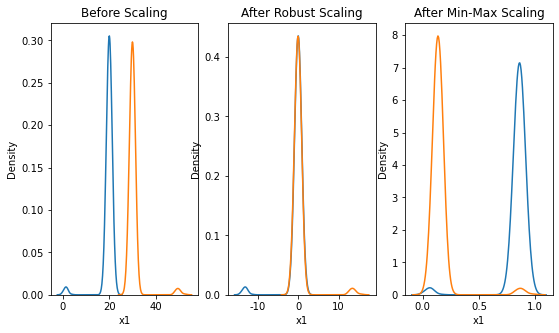

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X['x1'], ax=ax1)
sns.kdeplot(X['x2'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled['x1'], ax=ax2)
sns.kdeplot(robust_scaled['x2'], ax=ax2)

ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled['x1'], ax=ax3)
sns.kdeplot(minmax_scaled['x2'], ax=ax3)

## 归一化

In [15]:
from sklearn.preprocessing import Normalizer
norma = Normalizer()
norma.fit_transform([[3, 4]])

array([[0.6, 0.8]])

In [16]:
norma1 = Normalizer(norm='l1')
norma1.fit_transform([[3, 4]])

array([[0.42857143, 0.57142857]])

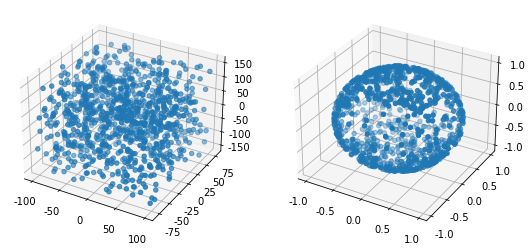

In [17]:
from mpl_toolkits.mplot3d import Axes3D

df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float)
})

scaler = Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])

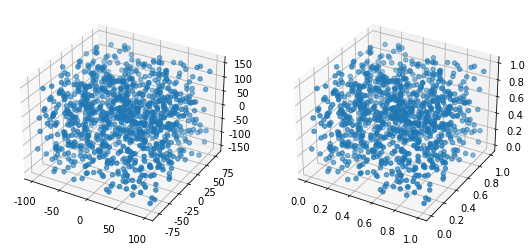

In [18]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])

# 项目案例

In [19]:
import pandas as pd
import numpy as np
df = pd.read_csv("./data/wine_data.csv")
df.head()

,Class_label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
df = pd.read_csv("./data/wine_data.csv", usecols=[0, 1, 2])
df.head()

,Class_label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

std_scaler = StandardScaler()
df_std = std_scaler.fit_transform(df[['Alcohol', 'Malic_acid']])

mm_scaler = MinMaxScaler()
df_mm = mm_scaler.fit_transform(df[['Alcohol', 'Malic_acid']])

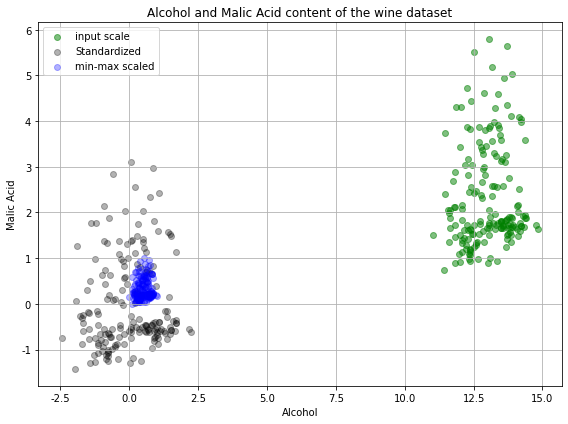

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Alcohol'], df['Malic_acid'], color='green', label='input scale', alpha=0.5)
plt.scatter(df_std[:, 0], df_std[:, 1], color='black', label='Standardized', alpha=0.3)
plt.scatter(df_mm[:, 0], df_mm[:, 1], color='blue', label='min-max scaled', alpha=0.3)
plt.title('Alcohol and Malic Acid content of the wine dataset')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()